In [1]:
pip install pandas scikit-learn openpyxl matplotlib seaborn numpy==1.26.0 statsmodels catboost timedelta skforecast

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

from skforecast.recursive import ForecasterRecursive
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/home/user/Desktop/fgdg/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Загружаем два датасета
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

# Делаем датасет datetime
train['dt'] = pd.to_datetime(train['dt'])
train = train.set_index('dt').asfreq('W-MON')['Цена на арматуру']

test['dt'] = pd.to_datetime(test['dt'])
test = test.set_index('dt').asfreq('W-MON')['Цена на арматуру']

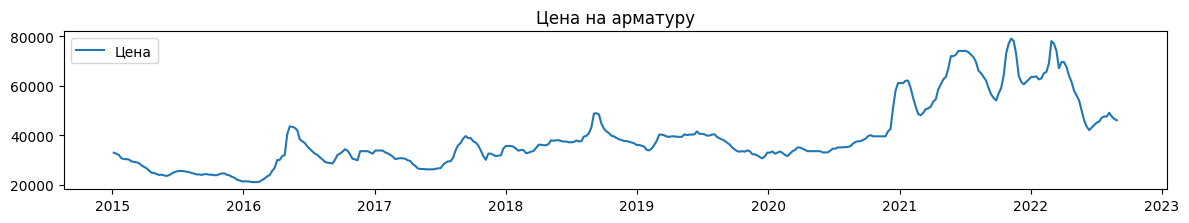

In [4]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(train, label='Цена')
plt.legend(loc='upper left')
plt.title('Цена на арматуру')
plt.tight_layout()
plt.show()


In [5]:
# Определяем простейшую модель
linear_regression = ForecasterRecursive(
    regressor=LinearRegression(),
    lags=24
)

# Обучаем модель
linear_regression.fit(train)

# Строим прогноз
predictions = linear_regression.predict(len(test))

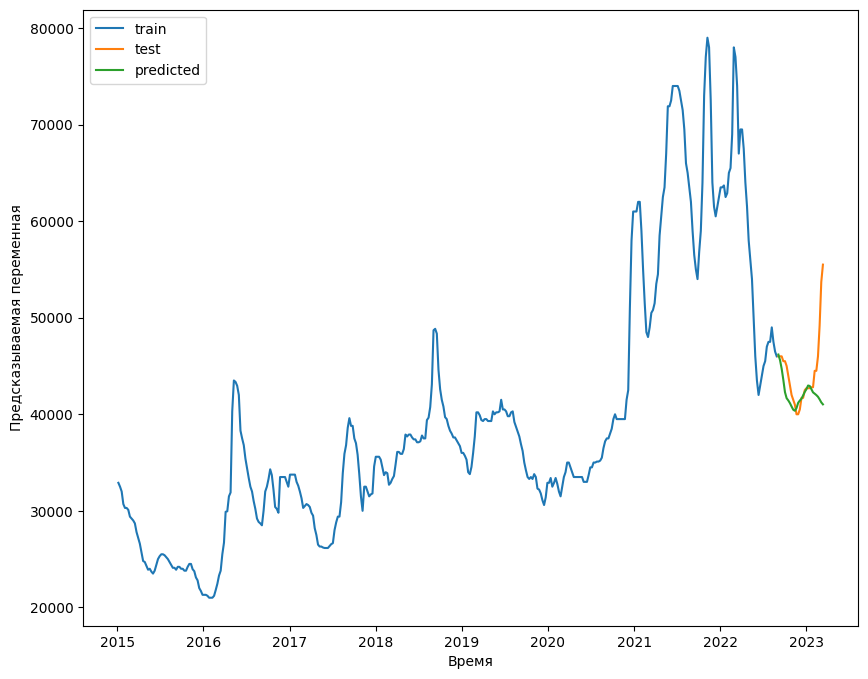

R²: -0.3821
MSE: 17716335.86
MAE: 2353.07


In [6]:
# График
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(predictions, label='predicted')
ax.set_xlabel('Время')
ax.set_ylabel('Предсказываемая переменная')
plt.legend()
plt.show()

# Метрики
r2 = r2_score(test, predictions)
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

# Выводим метрики
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")